In [7]:
#1
import os 
import librosa
import IPython.display as ipd 
import matplotlib.pyplot as plt
import numpy as np

In [249]:
#2.1
x, fs = librosa.load(os.path.join('data','imperfect_sos_cw_700_15_wpm.mp3')) 
ipd.display(ipd.Audio(data=x, rate=fs))

In [250]:
#2.2
X = np.fft.fft(x,norm='forward') 
F = np.fft.fftfreq(len(X), 1/fs)

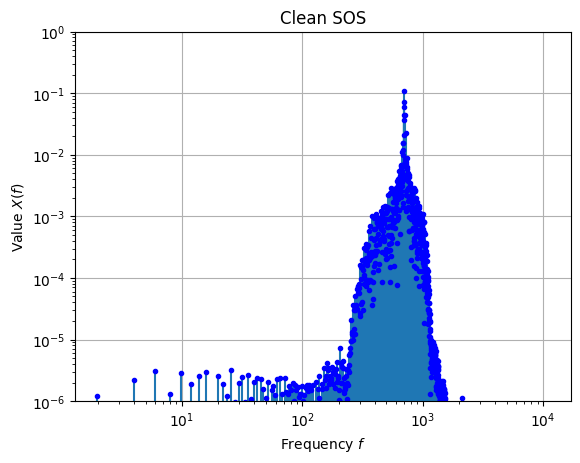

In [253]:
#2.3
plt.figure() 
plt.stem(np.fft.fftshift(F),np.fft.fftshift(np.abs(X)),markerfmt='b.') 
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-6,1)
plt.grid(True)
plt.xlabel('Frequency $f$')
plt.ylabel('Value $X(f)$')
plt.title('Clean SOS')
plt.show()

In [11]:
#2.4

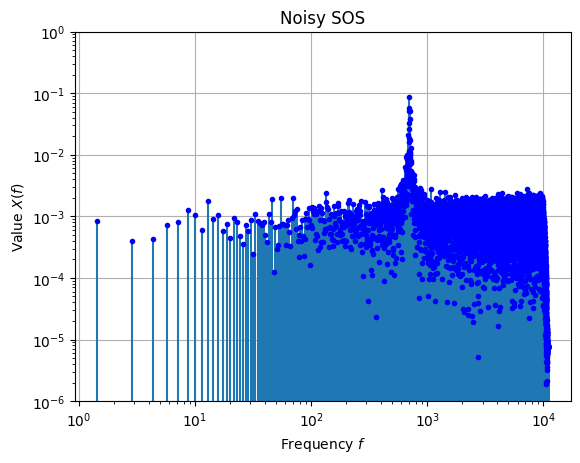

In [213]:
#2.5
x, fs = librosa.load(os.path.join('data','noisy_sos_cw_700_15_wpm.mp3')) 
ipd.display(ipd.Audio(data=x, rate=fs))

X = np.fft.fft(x,norm='forward') 
F = np.fft.fftfreq(len(X), 1/fs)

plt.figure() 
plt.stem(np.fft.fftshift(F),np.fft.fftshift(np.abs(X)),markerfmt='b.') 
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-6,1)
plt.grid(True)
plt.xlabel('Frequency $f$')
plt.ylabel('Value $X(f)$')
plt.title('Noisy SOS')
plt.show()

In [13]:
#2.6

In [264]:
#3.1
x, fs = librosa.load(os.path.join('data','imperfect_sos_cw_700_15_wpm.mp3')) 

X = np.fft.fft(x,norm='forward') 
F = np.fft.fftfreq(len(X), 1/fs)

fmin = max(np.fft.fftshift(F))
fmax = min(np.fft.fftshift(F))

for i in range(0,len(F)):
    if np.fft.fftshift(np.abs(X))[i]>1e-6:
        if np.fft.fftshift(F)[i]<fmin:
            fmin = np.fft.fftshift(F)[i]
        elif np.fft.fftshift(F)[i]>fmax:
            fmax = np.fft.fftshift(F)[i]

print(fmin)
print(fmax)

-2100.5661903478026
2100.5661903478026


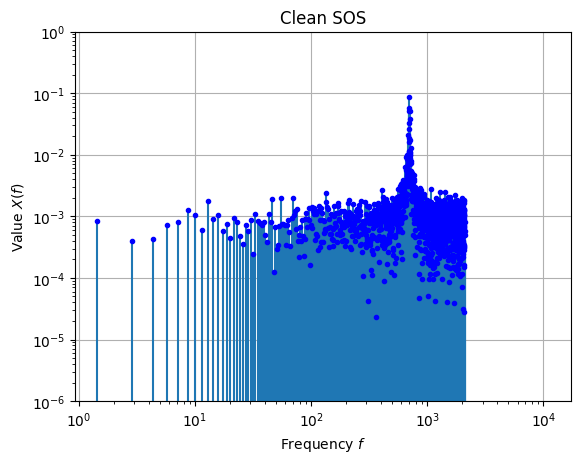

In [287]:
#3.2
x, fs = librosa.load(os.path.join('data','noisy_sos_cw_700_15_wpm.mp3')) 

X = np.fft.fft(x,norm='forward') 
F = np.fft.fftfreq(len(X), 1/fs)

for i in range(0,len(F)):
    if F[i]<fmin:
        X[i]=0
    elif F[i]>fmax:
        X[i]=0
        
        
plt.figure() 
plt.stem(np.fft.fftshift(F),np.fft.fftshift(np.abs(X)),markerfmt='b.') 
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-6,1)
plt.grid(True)
plt.xlabel('Frequency $f$')
plt.ylabel('Value $X(f)$')
plt.title('Clean SOS')
plt.show()

In [288]:
#3.3

print(np.fft.ifft(F))

array([-3.06276291e-14   +0.j        , -6.74445022e-16+3509.36651998j,
        8.28896659e-15-1754.6832972j , ...,
       -6.51671141e-15-1169.78890614j,  5.55883715e-14+1754.6832972j ,
       -1.42146418e-16-3509.36651998j])